# MCMC


In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

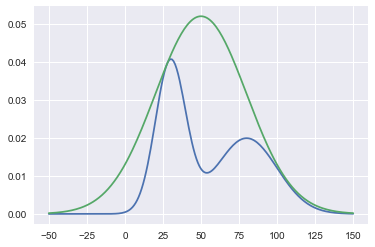

/Users/chenyl/.virtualenvs/python-lib-test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


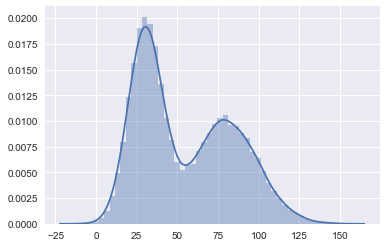

In [2]:
sns.set()


def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)


def q(x):
    return st.norm.pdf(x, loc=50, scale=30)


x = np.arange(-50, 151)
k = max(p(x) / q(x))


def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)


if __name__ == '__main__':
    plt.plot(x, p(x))
    plt.plot(x, k*q(x))
    plt.show()

    s = rejection_sampling(iter=100000)
    sns.distplot(s)